In [32]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from math import exp

In [33]:
class Hipothesis:
    positive = 1
    negative = -1

In [34]:
def log_loss(x,y,b):
    return np.log(1 + (np.exp(-(y * (b@x.T)))))

def log_loss_gradient(x,y,b):
    pred = 1/(1 + np.exp(b@x.T))
    diff = (pred - ((1 + y)/2))
    return diff * x

def train(X,Y,LR = 10**-4,bias = True,epochs = 25):
    losses = []
    if bias:
        X = np.hstack((X, np.ones((X.shape[0], 1), dtype=X.dtype)))
    B = np.zeros(X.shape[1])    
    j = 0
    prev_loss = 0
    while True:
        prevB = B
        cumm_loss = 0
        for i in range(X.shape[0]):
            x = X[i,:]
            y = Y[i,:]
            cumm_loss += log_loss(x,y,B)
            B = B - (LR *log_loss_gradient(x,y,B))    
            if cumm_loss == np.nan:
                print(x,y,B)
                break
        j += 1
        losses.append(cumm_loss)    
            
        print(f'EPOCH: {j} LOSS: {cumm_loss} WEIGHTS:{B}')
        if abs(cumm_loss - prev_loss) < 0.001 or np.linalg.norm((prevB,B)) < 0.001 or j > epochs:
            print('TRAINING FINISHED')
            print(f'FINAL WEIGHTS: {B}')
            return B
        prev_loss = cumm_loss
        prevB = B   
        return losses 

In [35]:
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

In [36]:
m1 = multivariate_normal([0,0],[[1,0],[0,1]])
m2 = multivariate_normal([5,5],[[1,0],[0,1]])
X1 = m1.rvs(100)
X2 = m2.rvs(100)
X = np.vstack((X1,X2))
Y1 = np.array([[1] * 100]).T
Y2 = np.array([[-1] * 100]).T
Y = np.vstack((Y1,Y2))
X,Y = unison_shuffled_copies(X,Y)

In [37]:
B = train(X,Y)

EPOCH: 1 LOSS: [132.42304122] WEIGHTS:[-0.02659711 -0.02691947 -0.00032369]
EPOCH: 2 LOSS: [120.11938107] WEIGHTS:[-0.05678105 -0.05752432 -0.00135003]
EPOCH: 3 LOSS: [108.63957917] WEIGHTS:[-0.09076557 -0.09203458 -0.00312309]
EPOCH: 4 LOSS: [98.59430304] WEIGHTS:[-0.12849664 -0.13039655 -0.00563496]
EPOCH: 5 LOSS: [90.45518279] WEIGHTS:[-0.16961735 -0.17224632 -0.00881816]
EPOCH: 6 LOSS: [84.40081508] WEIGHTS:[-0.21354429 -0.21698716 -0.01255955]
EPOCH: 7 LOSS: [80.29594777] WEIGHTS:[-0.25961649 -0.26394134 -0.016729  ]
EPOCH: 8 LOSS: [77.80393848] WEIGHTS:[-0.3072302  -0.31248831 -0.02120601]
EPOCH: 9 LOSS: [76.53377028] WEIGHTS:[-0.35590744 -0.36213564 -0.02589402]
EPOCH: 10 LOSS: [76.13895352] WEIGHTS:[-0.40530406 -0.41252788 -0.0307227 ]
EPOCH: 11 LOSS: [76.35397371] WEIGHTS:[-0.45518664 -0.46342346 -0.03564387]
EPOCH: 12 LOSS: [76.99178018] WEIGHTS:[-0.50540242 -0.51466391 -0.04062573]
EPOCH: 13 LOSS: [77.92674331] WEIGHTS:[-0.55585319 -0.56614715 -0.04564772]
EPOCH: 14 LOSS: [7

In [ ]:
X = np.hstack((X, np.ones((X.shape[0], 1), dtype=X.dtype)))
prex = np.empty(shape = 200)
for i in range(X.shape[0]):
    x = X[i,:]
    prex[i] = 1/(1 + np.exp(-(B@x.T)))

In [39]:
def make_ROC(pred,true):
    x,y = [],[]
    threashold = 0
    step = 0.01
    while True:
        true_negative =0
        true_positive=0
        false_negative=0
        false_positive=0
        for i in range(len(pred)):
            if pred[i] > threashold:
                if true[i] == 1:
                    true_positive += 1
                else:
                    false_positive += 1
            else:
                if true[i] == -1:
                    true_negative += 1
                else:
                    false_negative += 1
        alfa = false_positive/100
        beta = false_negative/100
        x.append(alfa)
        y.append(1 - beta)
        threashold += step
        if threashold >= 1:
            break
    plt.plot(x,y)
    plt.xlabel('alfa')
    plt.ylabel('1 - beta')
    plt.title('ROC curve')

In [40]:
def give_result(pred,y,threashold):
    good = 0
    bad = 0
    for i in range(len(pred)):
        if pred[i] > threashold and y[i] == 1:
            good += 1
        elif pred[i] < threashold and y[i] == -1:
            good += 1
        else:
            bad += 1
    return good,bad

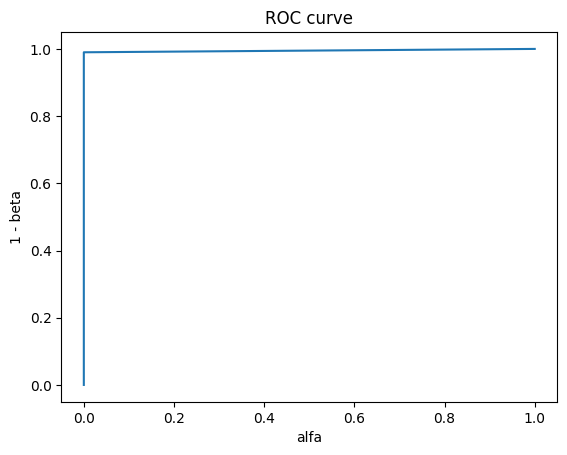

In [41]:
make_ROC(prex,Y)

In [42]:
give_result(prex,Y,0.5)

(148, 52)

In [43]:
m1 = multivariate_normal([0,0],[[1,0],[0,1]])
m2 = multivariate_normal([1,1],[[1,0],[0,1]])
X1 = m1.rvs(100)
X2 = m2.rvs(100)
X = np.vstack((X1,X2))
Y1 = np.array([[1] * 100]).T
Y2 = np.array([[-1] * 100]).T
Y = np.vstack((Y1,Y2))
X,Y = unison_shuffled_copies(X,Y)

In [44]:
B = train(X,Y)

EPOCH: 1 LOSS: [138.35920891] WEIGHTS:[-5.72559776e-03 -4.86205345e-03 -1.12531651e-05]
EPOCH: 2 LOSS: [137.7998646] WEIGHTS:[-1.14990381e-02 -9.77062641e-03 -4.52787102e-05]
EPOCH: 3 LOSS: [137.24066849] WEIGHTS:[-0.01732076 -0.0147262  -0.00010239]
EPOCH: 4 LOSS: [136.6817241] WEIGHTS:[-0.02319121 -0.01972927 -0.00018291]
EPOCH: 5 LOSS: [136.12313802] WEIGHTS:[-0.02911082 -0.0247803  -0.00028715]
EPOCH: 6 LOSS: [135.56501996] WEIGHTS:[-0.03508003 -0.02987978 -0.00041544]
EPOCH: 7 LOSS: [135.00748273] WEIGHTS:[-0.04109926 -0.03502819 -0.00056808]
EPOCH: 8 LOSS: [134.45064227] WEIGHTS:[-0.04716895 -0.04022601 -0.0007454 ]
EPOCH: 9 LOSS: [133.89461765] WEIGHTS:[-0.05328952 -0.0454737  -0.00094772]
EPOCH: 10 LOSS: [133.33953109] WEIGHTS:[-0.05946139 -0.05077175 -0.00117535]
EPOCH: 11 LOSS: [132.7855079] WEIGHTS:[-0.06568498 -0.05612062 -0.00142862]
EPOCH: 12 LOSS: [132.23267652] WEIGHTS:[-0.0719607  -0.06152078 -0.00170783]
EPOCH: 13 LOSS: [131.68116848] WEIGHTS:[-0.07828895 -0.06697268 

In [45]:
X = np.hstack((X, np.ones((X.shape[0], 1), dtype=X.dtype)))
prex = np.empty(shape = 200)
for i in range(X.shape[0]):
    x = X[i,:]
    prex[i] = 1/(1 + np.exp(-(B@x.T)))

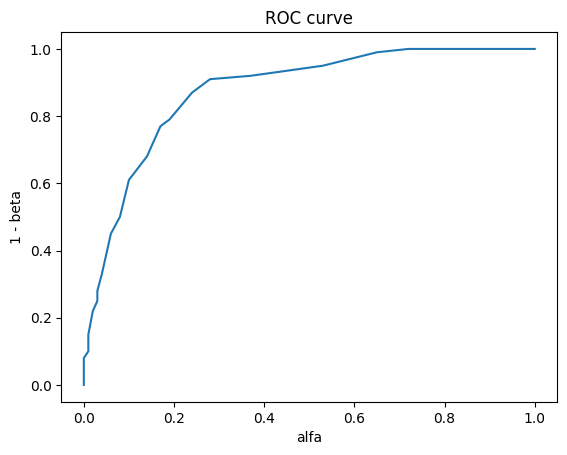

In [46]:
make_ROC(prex,Y)

In [47]:
give_result(prex,Y,0.5)

(142, 58)

In [48]:
m1 = multivariate_normal([0,0],[[1,0],[0,1]])
m2 = multivariate_normal([0.5,0.5],[[1,0],[0,1]])
X1 = m1.rvs(100)
X2 = m2.rvs(100)
X = np.vstack((X1,X2))
Y1 = np.array([[1] * 100]).T
Y2 = np.array([[-1] * 100]).T
Y = np.vstack((Y1,Y2))
X,Y = unison_shuffled_copies(X,Y)
B = train(X,Y)
X = np.hstack((X, np.ones((X.shape[0], 1), dtype=X.dtype)))
prex = np.empty(shape = 200)
for i in range(X.shape[0]):
    x = X[i,:]
    prex[i] = 1/(1 + np.exp(-(B@x.T)))

EPOCH: 1 LOSS: [138.5771888] WEIGHTS:[-1.91323873e-03 -2.89322803e-03 -9.03544437e-07]
EPOCH: 2 LOSS: [138.45741812] WEIGHTS:[-3.83886068e-03 -5.80266082e-03 -7.44024029e-06]
EPOCH: 3 LOSS: [138.33765956] WEIGHTS:[-5.77695314e-03 -8.72839464e-03 -1.96725195e-05]
EPOCH: 4 LOSS: [138.21792229] WEIGHTS:[-7.72760379e-03 -1.16705260e-02 -3.76632342e-05]
EPOCH: 5 LOSS: [138.09821568] WEIGHTS:[-9.69090072e-03 -1.46291516e-02 -6.14756546e-05]
EPOCH: 6 LOSS: [137.97854929] WEIGHTS:[-1.16669324e-02 -1.76043683e-02 -9.11734659e-05]
EPOCH: 7 LOSS: [137.85893284] WEIGHTS:[-0.01365579 -0.02059627 -0.00012682]
EPOCH: 8 LOSS: [137.73937628] WEIGHTS:[-0.01565756 -0.02360496 -0.00016848]
EPOCH: 9 LOSS: [137.6198897] WEIGHTS:[-0.01767233 -0.02663054 -0.00021622]
EPOCH: 10 LOSS: [137.50048344] WEIGHTS:[-0.01970019 -0.02967309 -0.00027011]
EPOCH: 11 LOSS: [137.38116799] WEIGHTS:[-0.02174124 -0.03273273 -0.0003302 ]
EPOCH: 12 LOSS: [137.26195405] WEIGHTS:[-0.02379556 -0.03580954 -0.00039657]
EPOCH: 13 LOSS:

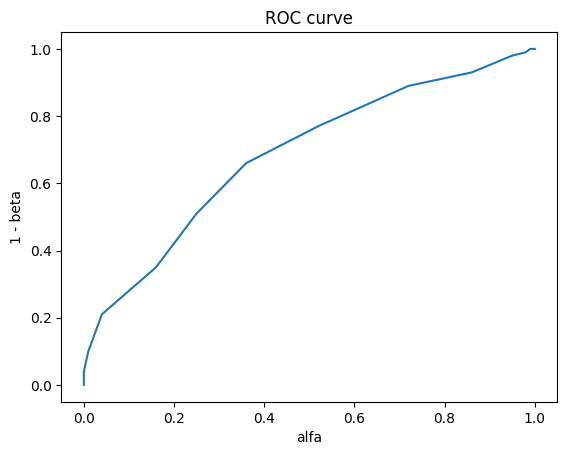

In [49]:
make_ROC(prex,Y)

In [50]:
give_result(prex,Y,0.5)

(126, 74)